<a href="https://colab.research.google.com/github/GeorgeSherif/ChatEGP/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install pygal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import os
import warnings
import csv
from textblob import TextBlob
import re
from nltk.stem.isri import ISRIStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import pygal as py
import matplotlib
plt.rcParams["figure.figsize"] = (8,5)
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 

from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/Finance'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileTotalFinance.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['6300.txt', '4706.txt', '4800.txt', '4726.txt', '4840.txt', '5959.txt', '4930.txt', '4727.txt', '4337.txt', '4990.txt', '4322.txt', '5151.txt', '5778.txt', '6378.txt', '6016.txt', '6121.txt', '6136.txt', '5937.txt', '6043.txt', '6472.txt', '4722.txt', '4427.txt', '4775.txt', '5317.txt', '5606.txt', '6308.txt', '6245.txt', '4422.txt', '5726.txt', '4442.txt', '6172.txt', '5442.txt', '6167.txt', '5661.txt', '6165.txt', '4957.txt', '5329.txt', '5313.txt', '4913.txt', '5597.txt', '4925.txt', '5117.txt', '5931.txt', '6161.txt', '5242.txt', '5520.txt', '6116.txt', '5255.txt', '5892.txt', '4943.txt', '5085.txt', '4314.txt', '5207.txt', '5991.txt', '5722.txt', '4816.txt', '5530.txt', '5421.txt', '5919.txt', '5428.txt', '5873.txt', '6478.txt', '5232.txt', '4912.txt', '4458.txt', '6211.txt', '4448.txt', '5366.txt', '6272.txt', '6215.txt', '4290.txt', '5829.txt', '4618.txt', '5155.txt', '5518.txt', '6450.txt', '6254.txt', '4661.txt', '4980.txt', '6228.txt', '5528.txt', '4363.txt', '6083.txt', '61

In [7]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Tech'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileTech.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0095.txt', '0052.txt', '0046.txt', '0053.txt', '0119.txt', '0066.txt', '0057.txt', '0112.txt', '0008.txt', '0049.txt', '0061.txt', '0108.txt', '0110.txt', '0084.txt', '0019.txt', '0093.txt', '0102.txt', '0029.txt', '0004.txt', '0099.txt', '0114.txt', '0100.txt', '0030.txt', '0015.txt', '0116.txt', '0076.txt', '0022.txt', '0037.txt', '0006.txt', '0101.txt', '0023.txt', '0025.txt', '0035.txt', '0028.txt', '0018.txt', '0014.txt', '0044.txt', '0089.txt', '0064.txt', '0088.txt', '0043.txt', '0054.txt', '0090.txt', '0069.txt', '0012.txt', '0117.txt', '0041.txt', '0059.txt', '0026.txt', '0072.txt', '0021.txt', '0091.txt', '0000.txt', '0027.txt', '0003.txt', '0001.txt', '0115.txt', '0082.txt', '0032.txt', '0020.txt', '0013.txt', '0039.txt', '0062.txt', '0067.txt', '0094.txt', '0045.txt', '0071.txt', '0080.txt', '0005.txt', '0034.txt', '0060.txt', '0073.txt', '0010.txt', '0070.txt', '0077.txt', '0011.txt', '0040.txt', '0048.txt', '0107.txt', '0104.txt', '0079.txt', '0042.txt', '0087.txt', '00

KeyboardInterrupt: ignored

In [ ]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Sports'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileSports.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0113.txt', '0085.txt', '0063.txt', '0119.txt', '0070.txt', '0123.txt', '0028.txt', '0035.txt', '0005.txt', '0135.txt', '0044.txt', '0007.txt', '0097.txt', '0059.txt', '0131.txt', '0122.txt', '0055.txt', '0067.txt', '0021.txt', '0053.txt', '0016.txt', '0015.txt', '0120.txt', '0043.txt', '0046.txt', '0010.txt', '0105.txt', '0036.txt', '0098.txt', '0101.txt', '0050.txt', '0034.txt', '0089.txt', '0057.txt', '0092.txt', '0066.txt', '0023.txt', '0139.txt', '0125.txt', '0109.txt', '0003.txt', '0124.txt', '0014.txt', '0077.txt', '0116.txt', '0017.txt', '0137.txt', '0045.txt', '0074.txt', '0052.txt', '0080.txt', '0026.txt', '0033.txt', '0126.txt', '0103.txt', '0049.txt', '0069.txt', '0076.txt', '0011.txt', '0000.txt', '0134.txt', '0073.txt', '0041.txt', '0060.txt', '0004.txt', '0009.txt', '0075.txt', '0084.txt', '0095.txt', '0128.txt', '0072.txt', '0056.txt', '0091.txt', '0037.txt', '0099.txt', '0062.txt', '0064.txt', '0002.txt', '0024.txt', '0114.txt', '0087.txt', '0102.txt', '0038.txt', '01

In [ ]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Religion'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileReligion.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0073.txt', '0053.txt', '0023.txt', '0072.txt', '0065.txt', '0014.txt', '0084.txt', '0075.txt', '0066.txt', '0105.txt', '0022.txt', '0056.txt', '0047.txt', '0098.txt', '0042.txt', '0006.txt', '0028.txt', '0003.txt', '0031.txt', '0051.txt', '0099.txt', '0115.txt', '0049.txt', '0109.txt', '0012.txt', '0041.txt', '0009.txt', '0035.txt', '0103.txt', '0067.txt', '0011.txt', '0113.txt', '0117.txt', '0080.txt', '0111.txt', '0100.txt', '0037.txt', '0069.txt', '0123.txt', '0040.txt', '0007.txt', '0008.txt', '0118.txt', '0026.txt', '0043.txt', '0119.txt', '0005.txt', '0060.txt', '0077.txt', '0070.txt', '0126.txt', '0106.txt', '0091.txt', '0104.txt', '0101.txt', '0112.txt', '0082.txt', '0038.txt', '0081.txt', '0058.txt', '0045.txt', '0063.txt', '0036.txt', '0000.txt', '0124.txt', '0071.txt', '0018.txt', '0025.txt', '0030.txt', '0001.txt', '0102.txt', '0120.txt', '0083.txt', '0039.txt', '0107.txt', '0015.txt', '0033.txt', '0052.txt', '0108.txt', '0050.txt', '0092.txt', '0034.txt', '0019.txt', '00

In [ ]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Politics'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_filePolitics.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0088.txt', '0064.txt', '0034.txt', '0077.txt', '0076.txt', '0053.txt', '0059.txt', '0067.txt', '0006.txt', '0086.txt', '0072.txt', '0109.txt', '0010.txt', '0079.txt', '0081.txt', '0050.txt', '0048.txt', '0095.txt', '0105.txt', '0082.txt', '0065.txt', '0045.txt', '0015.txt', '0106.txt', '0049.txt', '0070.txt', '0101.txt', '0063.txt', '0032.txt', '0102.txt', '0071.txt', '0096.txt', '0004.txt', '0075.txt', '0016.txt', '0089.txt', '0103.txt', '0022.txt', '0019.txt', '0056.txt', '0030.txt', '0107.txt', '0009.txt', '0090.txt', '0069.txt', '0057.txt', '0036.txt', '0039.txt', '0029.txt', '0038.txt', '0037.txt', '0054.txt', '0112.txt', '0011.txt', '0113.txt', '0084.txt', '0092.txt', '0042.txt', '0080.txt', '0078.txt', '0002.txt', '0085.txt', '0052.txt', '0066.txt', '0108.txt', '0100.txt', '0008.txt', '0047.txt', '0013.txt', '0020.txt', '0023.txt', '0062.txt', '0110.txt', '0061.txt', '0044.txt', '0074.txt', '0068.txt', '0098.txt', '0051.txt', '0014.txt', '0027.txt', '0012.txt', '0083.txt', '00

In [ ]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Medical'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileMedical.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0041.txt', '0141.txt', '0063.txt', '0172.txt', '0004.txt', '0051.txt', '0144.txt', '0054.txt', '0126.txt', '0068.txt', '0036.txt', '0177.txt', '0062.txt', '0088.txt', '0134.txt', '0154.txt', '0101.txt', '0001.txt', '0174.txt', '0095.txt', '0077.txt', '0140.txt', '0194.txt', '0093.txt', '0124.txt', '0029.txt', '0160.txt', '0163.txt', '0168.txt', '0059.txt', '0024.txt', '0052.txt', '0084.txt', '0207.txt', '0003.txt', '0021.txt', '0202.txt', '0092.txt', '0184.txt', '0070.txt', '0073.txt', '0120.txt', '0098.txt', '0046.txt', '0035.txt', '0127.txt', '0087.txt', '0181.txt', '0082.txt', '0122.txt', '0012.txt', '0057.txt', '0149.txt', '0091.txt', '0152.txt', '0031.txt', '0165.txt', '0049.txt', '0097.txt', '0205.txt', '0108.txt', '0081.txt', '0139.txt', '0116.txt', '0115.txt', '0158.txt', '0159.txt', '0090.txt', '0150.txt', '0074.txt', '0040.txt', '0211.txt', '0183.txt', '0005.txt', '0076.txt', '0094.txt', '0067.txt', '0058.txt', '0105.txt', '0123.txt', '0196.txt', '0178.txt', '0195.txt', '02

In [ ]:
# Directory containing the text files to merge
dir_path = '/content/drive/MyDrive/NLP/Finance'

# List of all the text files in the directory
files = os.listdir(dir_path)
print(files)

# Open the CSV file for writing
with open('merged_fileFinance.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row to the CSV file
    writer.writerow(['filename', 'content'])

    # Iterate through all the text files in the directory
    for file in files:
        if file.endswith('.txt'):
            # Open the text file for reading
            with open(os.path.join(dir_path, file), 'r') as f:
                content = f.read()
                
            # Write the filename and content to the CSV file
            writer.writerow([file, content])

# Close the CSV file
csvfile.close()

['0092.txt', '0008.txt', '0028.txt', '0106.txt', '0091.txt', '0077.txt', '0063.txt', '0095.txt', '0026.txt', '0032.txt', '0012.txt', '0018.txt', '0071.txt', '0064.txt', '0033.txt', '0011.txt', '0110.txt', '0016.txt', '0045.txt', '0078.txt', '0096.txt', '0060.txt', '0098.txt', '0088.txt', '0090.txt', '0004.txt', '0101.txt', '0051.txt', '0069.txt', '0001.txt', '0103.txt', '0052.txt', '0005.txt', '0104.txt', '0059.txt', '0046.txt', '0037.txt', '0007.txt', '0085.txt', '0072.txt', '0105.txt', '0108.txt', '0036.txt', '0050.txt', '0029.txt', '0013.txt', '0087.txt', '0019.txt', '0024.txt', '0048.txt', '0075.txt', '0086.txt', '0115.txt', '0021.txt', '0102.txt', '0006.txt', '0023.txt', '0079.txt', '0073.txt', '0065.txt', '0113.txt', '0053.txt', '0043.txt', '0015.txt', '0034.txt', '0082.txt', '0035.txt', '0112.txt', '0080.txt', '0049.txt', '0002.txt', '0003.txt', '0014.txt', '0084.txt', '0093.txt', '0054.txt', '0020.txt', '0000.txt', '0041.txt', '0111.txt', '0010.txt', '0009.txt', '0099.txt', '00

In [ ]:
dfT = pd.read_csv("merged_fileTech.csv")
print(dfT.describe)

In [ ]:
dfS = pd.read_csv("merged_fileSports.csv")
print(dfS.describe)


In [ ]:
dfR = pd.read_csv("merged_fileReligion.csv")
print(dfR.describe)

In [ ]:
dfP = pd.read_csv("merged_filePolitics.csv")
print(dfP.describe)

In [ ]:
dfM = pd.read_csv("merged_fileMedical.csv")
print(dfM.describe)

In [ ]:
dfF = pd.read_csv("merged_fileFinance.csv")
print(dfF.describe)

In [ ]:
dfC = pd.read_csv("merged_fileCulture.csv")
print(dfC.describe)

In [8]:
dfAll = pd.read_csv("merged_fileTotalFinance.csv")


In [9]:
print(dfAll.describe)

<bound method NDFrame.describe of       filename                                            content
0     6300.txt  بلغت تسييلات الأجانب في سوق دبي المالي أمس 59 ...
1     4706.txt  تواصلت مسيرة الصعود في البورصات الإقليمية وسط ...
2     4800.txt  انخفض المؤشر العام لسوق أبوظبي للأوراق المالية...
3     4726.txt  أبوظبي:«الخليج»أغلق المؤشر العام لسوق أبوظبي ل...
4     4840.txt  أبوظبي علي أسعد: رغم تراجع أسعار النفط أمس إلا...
...        ...                                                ...
6495  0688.txt  أعلنت شركة “إعمار العقارية” في إفصاح لسوق دبي ...
6496  1055.txt  قلصت أسواق الأسهم المحلية خسائرها خلال جلسة ال...
6497  0393.txt  قال خبراء في أسواق الأسهم المحلية إن التحدي ال...
6498  0270.txt  واصلت مؤشرات أسواق المال في الدولة صعودها على ...
6499  0583.txt  بلغت قيمة مشتريات الأجانب، غير العرب، من الأسه...

[6500 rows x 2 columns]>


In [ ]:
# pd.concat([dfC, dfS, dfT, dfR, dfP, dfM, dfF ]).to_csv('mergedAll.csv', index=False)
# dfAll = pd.read_csv("mergedAll.csv")
# print(dfAll.describe)

In [10]:
!pip install wordfreq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
words_set = set()

for doc in  dfAll.content:
    words = doc.split(' ')
    words_set = words_set.union(set(words))
    
print('Number of words in the corpus:',len(words_set))
print('The words in the corpus: \n', words_set)

wordset=[]
for i in words_set:
  wordset.append(i)

Number of words in the corpus: 100421
The words in the corpus: 
 {'و32.5', '2،815', '24,2', 'ال30', 'وتُتيح', 'بتسييلها', '5548', '.3108', 'و1،01%', '271', '37،1%', '3.02', 'ولتلبية', 'بسمعة', '.وتدفقت', 'وبكين', 'احتسب', 'ورقية،', 'الحالية.من', 'النزاهة', 'وامتد', 'ومحفوظة', '9،073،138', 'تصميم', 'وكالات', 'تقييم', 'النقل.وهبط', 'هيتستليكوم،', 'تمنح', 'و232.5', '4.56%.وجاء', 'عد', 'و361', '.2،561', 'المفتوحة،', 'وأذونات', 'ويفوز', 'للدراسات', '.صناديق', 'وأربعين', '172%،', 'سيصاحب', '(5-', '2676', '80.9', 'ناقلة', 'للإشاعات', 'دولاً', '.270،791،051', 'وايضاً', '5،859', 'للخسائر،', 'ألأجنبية', '.3،805', 'تسنح', 'مايكروسوفت', 'الماضيين', '2،1%', 'البنوك.تركزت', 'تراجعه', 'والأفراد', '106،814،378', '4468.41', 'وشركاء', 'تواجدها', 'فالأرباح', '1137.05', '2،62%', '122.13', 'محذراً', '4.8%؛', '648.8', 'ل«إشراق»', '25،934', '11،666،686', '14.3%،', '759.3', '16،200،028', 'ﺍﻟﻘروض', 'لحزمة', '4608.97', 'name', '3،022', '.15،467،834', 'باقي', 'استنفدت', 'السعودي.', 'توصيات', '14.78%', 'غاز.', '3

In [8]:
df_tf = pd.DataFrame(np.zeros((len(dfAll), len(words_set))), columns=wordset)
for i in range(len(dfAll.content)):
  words = dfAll.content[i].split(' ') # Words in the document
  for w in words:
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))
df_tf

,أكثرية,الطرفان،,بوصفها,دفعت,ملفات,والاسمية,402.540,المعرفة،,ديستريكت,4.02%,...,154،7,يبتعدون,1.11%.شهد,3055,1،614,تناولوا,.4560,10،914,595.64,وبلدكو
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_tf.columns

Index(['أكثرية', 'الطرفان،', 'بوصفها', 'دفعت', 'ملفات', 'والاسمية', '402.540',
       'المعرفة،', 'ديستريكت', '4.02%',
       ...
       '154،7', 'يبتعدون', '1.11%.شهد', '3055', '1،614', 'تناولوا', '.4560',
       '10،914', '595.64', 'وبلدكو'],
      dtype='object', length=100421)

In [13]:
tfIdfsums = pd.DataFrame({
    'tf':(np.zeros(100421)),
    'word':""
})
for wordColumn in df_tf:
  sum=0
  occurances=0
  for docnum in range(len(df_tf[wordColumn])):
    if(df_tf[wordColumn][docnum]>0):
      sum+=df_tf[wordColumn][docnum]
      occurances+=1
  tfIdfsums=tfIdfsums.append({'tf':sum/occurances,'word':wordColumn},ignore_index=True)

In [14]:
tfIdfsums.nlargest(40, 'tf')

,tf,word
131236,0.071429,للتنقيب
187430,0.068085,جنيهاً
116917,0.066667,و2،22
120284,0.066667,الإسكندينافية
125073,0.066667,449،9
130963,0.066667,و0،935
150785,0.066667,0،927
106652,0.062500,17-12-2012
110704,0.058824,775،234
111225,0.058824,«الخليج»قررت


In [ ]:
mostCommon100words = pd.DataFrame({
    'tf':(np.zeros(100)),
    'word':""
})
mostCommon100words=mostCommon100words.sort_values(by=["tf"],ascending=False,ignore_index=True) 
print(mostCommon100words)
for wordColumn in df_tf:
  sum=0
  for docnum in range(len(df_tf[wordColumn])):
    sum+=df_tf[wordColumn][docnum]
  if(sum>=mostCommon100words.iloc[99][0]):
    
    mostCommon100words.at[99,'tf']=sum
    mostCommon100words.at[99,'word']=wordColumn
    mostCommon100words=mostCommon100words.sort_values(by=["tf"],ascending=False,ignore_index=True) 
    
  #print(mostCommon100words)  

In [12]:
mostCommon100words

,tf,word
0,139.971946,من
1,138.331009,درهم
2,92.418513,بنسبة
3,81.195531,على
4,72.009909,سهم
...,...,...
95,6.651386,وبلغ
96,6.532264,الوطنية
97,6.407864,مقارنة
98,6.275428,انخفاض


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(dfAll.content)

In [13]:
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
words_setII = tr_idf_model.get_feature_names_out()

print(words_setII)

['00' '000' '0005' ... 'ﺗﻐطﻳﺔ' 'ﺧﺳﺎﺋر' 'ﻧﺳﺑﺔ']


In [15]:
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_setII)

df_tf_idf

,00,000,0005,001,00125,002,00275,003,0039,004,...,٥٣,٥٦,٦٠,٧٠,٧٥,٩٥,ﺍﻟﻘروض,ﺗﻐطﻳﺔ,ﺧﺳﺎﺋر,ﻧﺳﺑﺔ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
the100highestTFIDF = pd.DataFrame({
    'tfidf':(np.zeros(100)),
    'word':""
})
the100highestTFIDF=the100highestTFIDF.sort_values(by=["tfidf"],ascending=False,ignore_index=True) 
for wordColumn in df_tf_idf:
  sum=0
  for docnum in range(len(df_tf_idf[wordColumn])):
    sum+=df_tf_idf[wordColumn][docnum]
  if(sum>=the100highestTFIDF.iloc[99][0]):
    
    the100highestTFIDF.at[99,'tfidf']=sum
    the100highestTFIDF.at[99,'word']=wordColumn
    the100highestTFIDF=the100highestTFIDF.sort_values(by=["tfidf"],ascending=False,ignore_index=True) 

KeyboardInterrupt: ignored

In [ ]:
the100highestTFIDF

,tf,word
0,90.615066,في
1,68.179888,من
2,41.141918,على
3,33.796150,إلى
4,31.159923,أن
...,...,...
95,5.661075,مجلس
96,5.660946,المالية
97,5.659712,خدمات
98,5.604669,مستوى


In [16]:
text = " ".join(doc for doc in dfAll.content)
print ("There are {} words in the combination of all Corpus.".format(len(text)))

There are 11109838 words in the combination of all Corpus.


In [17]:
! pip install python-bidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
! pip install --upgrade arabic-reshaper
!pip install ar_wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bidi.algorithm import get_display
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper 
from collections import Counter

import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display
# os.chdir("C:")
#text = arabic_reshaper.reshape(text)

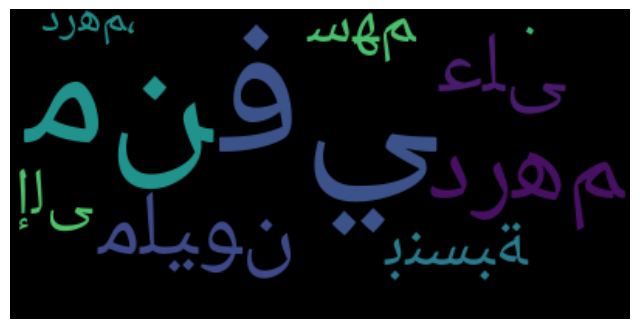

In [20]:
from ar_wordcloud import ArabicWordCloud
rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(text.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(10)}

font_file = '/content/drive/MyDrive/NLP/NotoNaskhArabic-Regular.ttf' # download from: https://www.google.com/get/noto
wordcloud = WordCloud(font_path=font_file).generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
awc = ArabicWordCloud(background_color="white")
wc = awc.from_text(text)
wc

In [22]:
wc

Number of characters present in each sentence

<Axes: >

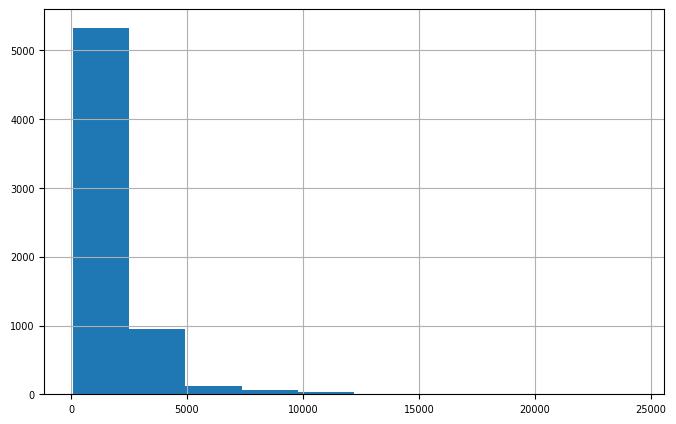

In [23]:
dfAll['content'].str.len().hist()

Number of words appearing in each news text file.

In [25]:
text.str.split().map(lambda x: len(x)).hist()

AttributeError: ignored

Average word length in each sentence.

<Axes: >

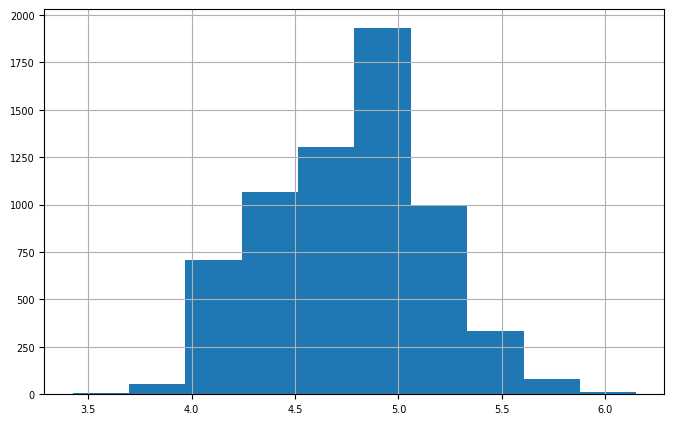

In [26]:
dfAll['content'].str.split().apply(lambda x : [len(i) for i in x]). map(lambda x: np.mean(x)).hist()

Removing StopWords

In [44]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('arabic'))
stop

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'ء',
 'ءَ',
 'آ',
 'آب',
 'آذار',
 'آض',
 'آمينَ',
 'آناء',
 'آنفا',
 'آه',
 'آها',
 'آهاً',
 'آهٍ',
 'آهِ',
 'آي',
 'أ',
 'أبدا',
 'أبريل',
 'أبو',
 'أبٌ',
 'أجل',
 'أجمع',
 'أحد',
 'أخبر',
 'أخذ',
 'أخو',
 'أخٌ',
 'أربع',
 'أربعاء',
 'أربعة',
 'أربعمئة',
 'أربعمائة',
 'أرى',
 'أسكن',
 'أصبح',
 'أصلا',
 'أضحى',
 'أطعم',
 'أعطى',
 'أعلم',
 'أغسطس',
 'أف',
 'أفريل',
 'أفعل به',
 'أفٍّ',
 'أقبل',
 'أقل',
 'أكتوبر',
 'أكثر',
 'أل',
 'ألا',
 'ألف',
 'ألفى',
 'أم',
 'أما',
 'أمام',
 'أمامك',
 'أمامكَ',
 'أمد',
 'أمس',
 'أمسى',
 'أمّا',
 'أن',
 'أنا',
 'أنبأ',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'أنتِ',
 'أنشأ',
 'أنى',
 'أنًّ',
 'أنّى',
 'أهلا',
 'أو',
 'أوت',
 'أوشك',
 'أول',
 'أولئك',
 'أولاء',
 'أولالك',
 'أوه',
 'أوّهْ',
 'أى',
 'أي',
 'أيا',
 'أيار',
 'أيضا',
 'أيلول',
 'أين',
 'أينما',
 'أيها',
 'أيّ',
 'أيّان',
 'أُفٍّ',
 'ؤ',
 'إحدى',
 'إذ',
 'إذا',
 'إذاً',
 'إذما',
 'إذن',
 'إزاء',
 'إلا',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'إليكنّ',
 'إليكَ',
 'إلَيْكَ',
 'إلّا',


In [45]:
corpus=[]
new= dfAll['content'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

<BarContainer object of 15 artists>

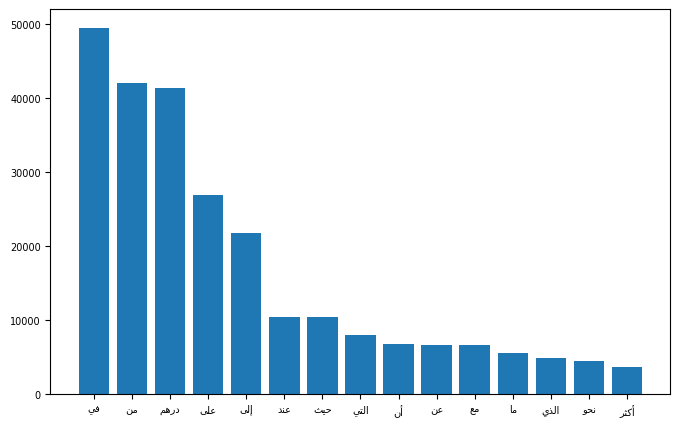

In [52]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:15] 
x,y=zip(*top)
#print(x[i])
my_list = list(x)
for i in range(len(my_list)):
  my_list[i] = get_display(arabic_reshaper.reshape(x[i]))
plt.bar(my_list,y)

Domain Specific StopWords

<Axes: >

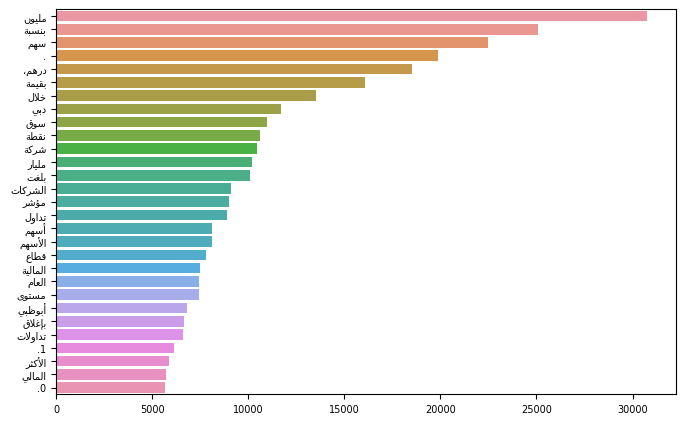

In [41]:
from bidi.algorithm import get_display
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(get_display(arabic_reshaper.reshape(word)))
        y.append(count)

sns.barplot(x=y,y=x)

Word Cloud after Stop Word Removal

TF after Stop Word Removal

TF-IDF after StopWord Removal

Bi Grams

In [53]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: >

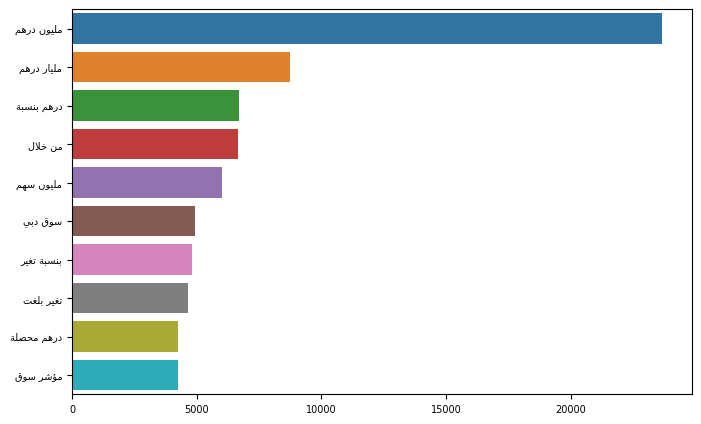

In [55]:
top_n_bigrams=get_top_ngram(dfAll['content'],2)[:15] 
x,y=map(list,zip(*top_n_bigrams)) 
my_list = list(x)
for i in range(len(my_list)):
  my_list[i] = get_display(arabic_reshaper.reshape(x[i]))
sns.barplot(x=y,y=my_list)


Tri-Grams

<Axes: >

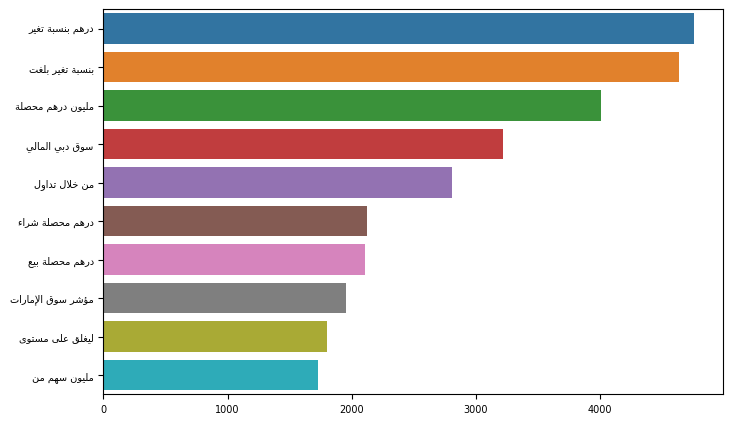

In [58]:
top_n_trigrams=get_top_ngram(dfAll['content'],3)[:15] 
x,y=map(list,zip(*top_n_trigrams)) 
my_list = list(x)
for i in range(len(my_list)):
  my_list[i] = get_display(arabic_reshaper.reshape(x[i]))
sns.barplot(x=y,y=my_list)